# Representation and Archetypes in Fictional Media

## Introduction

This final project is based around the [Open Psychometrics "Which Character" Quiz](https://openpsychometrics.org/tests/characters/documentation/). The quiz follows a standard internet format: Respondents assess themselves on series of opposed traits (e.g., are you more selfish or altruistic?), and at the end of the quiz, they are presented with their most similar fictional character (e.g., Batman or Buffy the Vampire Slayer). After the quiz has been completed, users are invited to rate the personalities of the characters themselves (e.g., is Batman more altruistic or selfish?). Open Psychometrics researchers have aggregated the ratings of 2,125 characters across 500 dimensions on a 100-point scale. The aggregate ratings are based on 3,386,031 user responses. Our work is inspired by the work of the [Vermont Computational Story Lab](https://compstorylab.org/archetypometrics/).

Our goal is to explore patterns in the data and investigate associations that may suggest deeper cultural norms about how certain categories of people are depicted in fiction. Specifically, we will investigate the `straight_queer`, `young_old`, `masculine_feminine`, and `rich_poor` demographic categories. By categorizing characters based on respondents' ratings on these dimensions, we are assessing how _perceptions_ of these categories are related to _perceptions_ of other dimensions. Lastly, we will identify key potential archetypes with a mixture of principal component analysis (PCA), Gaussian mixture model (GMM), and hierarchical agglomerative clustering (HAC).

## Data Description

The dataset `characters-aggregated-scores.csv` was downloaded from [Open Psychometrics](https://openpsychometrics.org/tests/characters/data/). Supplemental datasets called `variable-key.csv` and `character-key.csv` (to provide variable and character names) were developed based on the online documentation, which is available here as an `.html` file in the `data` folder. _Note: If downloading an updated version of the dataset, the data formats, character names, and variables might have changed._

The `characters-aggregated-scores.csv` has 2125 rows, 501 columns which include an id column which is an object data type and BAP# ratings, and no missing values. The `variable-key.csv` data set provides information about what the BAP# columns correspond to in terms of adjective pairs for the ratings. The `character-key.csv` provides information on the `id` column relating each row to the character and movie/novel source for that character.

The BAP# ratings are scored from 1-100, where values >=50 correspond to the right adjective while values <50 correspond to the left adjective in the adjective pairs. For example, if a character got a score of 60 for the "playful_serious" feature, they would be considered more "serious". If another character got score of 30 they would be considered more "playful".

See preview of the datasets below.

### Imports

In [125]:
import pandas as pd
from IPython.display import Image

### Load the Data

In [126]:
# here is modularized function for this section:
def initial_data_look(data): #import from python script later on
    print("Here are the first 5 rows of the data:")
    display(data.head())
    print("---------------------------------------------------------")
    print("The number of rows and columns in this dataset are", data.shape)
    print("---------------------------------------------------------")
    print("Here are the data types of each of the columns:")
    display(data.info())
    print("---------------------------------------------------------")
    print("Checking if there are any missing values:", np.mean(data.isna()))
    
char_score_data = pd.read_csv("data/characters-aggregated-scores.csv", sep=",")
var_key = pd.read_csv("data/variable-key.csv")
char_key = pd.read_csv("data/character-key.csv")

In [127]:
initial_data_look(char_score_data)

Here are the first 5 rows of the data:


,id,BAP1,BAP2,BAP3,BAP4,BAP5,BAP6,BAP7,BAP8,BAP9,...,BAP491,BAP492,BAP493,BAP494,BAP495,BAP496,BAP497,BAP498,BAP499,BAP500
0,HML/1,62.4,69.8,92.6,31.9,61.2,53.5,28.8,44.0,63.9,...,27.5,78.8,40.5,53.4,77.4,14.0,56.3,51.4,87.4,8.2
1,HML/2,79.1,62.2,68.5,78.1,36.9,40.3,42.6,40.4,23.3,...,42.8,23.9,84.9,73.7,49.0,73.7,21.1,71.0,26.3,63.3
2,HML/3,83.2,85.3,69.4,21.8,39.1,35.8,49.9,16.0,59.3,...,11.3,29.7,50.7,78.6,68.2,20.3,31.6,48.7,74.3,55.0
3,HML/4,72.5,65.0,67.1,28.2,66.3,47.9,30.4,18.1,34.4,...,31.6,22.2,75.7,60.4,79.0,55.9,25.5,48.2,80.1,49.6
4,HML/5,40.7,48.1,81.8,90.0,52.6,59.3,41.1,73.9,43.0,...,35.6,42.4,75.0,61.7,61.3,15.1,57.3,54.7,90.3,24.9


---------------------------------------------------------
The number of rows and columns in this dataset are (2125, 501)
---------------------------------------------------------
Here are the data types of each of the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Columns: 501 entries, id to BAP500
dtypes: float64(500), object(1)
memory usage: 8.1+ MB


None

---------------------------------------------------------
Checking if there are any missing values: 0.0


In [128]:
initial_data_look(var_key)

Here are the first 5 rows of the data:


,ID,scale
0,BAP1,playful_serious
1,BAP2,shy_bold
2,BAP3,cheery_sorrowful
3,BAP4,masculine_feminine
4,BAP5,charming_awkward


---------------------------------------------------------
The number of rows and columns in this dataset are (500, 2)
---------------------------------------------------------
Here are the data types of each of the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      500 non-null    object
 1   scale   500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


None

---------------------------------------------------------
Checking if there are any missing values: 0.0


In [129]:
initial_data_look(char_key)

Here are the first 5 rows of the data:


,id,name,source
0,HML/1,Prince Hamlet,Hamlet
1,HML/2,Queen Gertrude,Hamlet
2,HML/3,King Claudius,Hamlet
3,HML/4,Polonius,Hamlet
4,HML/5,Ophelia,Hamlet


---------------------------------------------------------
The number of rows and columns in this dataset are (2125, 3)
---------------------------------------------------------
Here are the data types of each of the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2125 non-null   object
 1   name    2125 non-null   object
 2   source  2125 non-null   object
dtypes: object(3)
memory usage: 49.9+ KB


None

---------------------------------------------------------
Checking if there are any missing values: 0.0


## Exploratory Data Analysis

### Data Preprocessing

We aggregated and cleaned the `characters-aggregated-scores.csv`, `variable-key.csv`, and `character-key.csv` datasets. Our preprocessing steps are as follows:
1. Merge character names and source from `character-key.csv` to `characters-aggregated-scores.csv`
2. Rename the columns based on the `variable-key.csv`
3. Drop a few specific columns:
   - BAPs with emojis which are hard to interpret and cause problems with visualization, so they have been labeled “INVALID.”
   - In addition, the authors accidentally included the “hard-soft” pair twice, so only the first pair is kept.

After cleaning up the data, there are more readable column names with the BAPs being the names of the adjective pairs. It is also clear which characters and sources each id corresponds to. Another big change to note is that there are still the same number of rows because there are no missing values, but there is now 464 BAP columns rather than 500 after removing duplicates and INVALID entries. We saved this aggregated and cleaned data as `char_score_data.csv`:

In [130]:
import pandas as pd
char_score_data = pd.read_csv("data/processed/char_score_data.csv")
char_score_data.head()

,id,character,source,playful_serious,shy_bold,cheery_sorrowful,masculine_feminine,charming_awkward,lewd_tasteful,intellectual_physical,...,cringing-away_welcoming-experience,stereotypical_boundary-breaking,energetic_mellow,hopeful_fearful,likes-change_resists-change,manic_mild,old-fashioned_progressive,gross_hygienic,stable_unstable,overthinker_underthinker
0,HML/1,Prince Hamlet,Hamlet,62.4,69.8,92.6,31.9,61.2,53.5,28.8,...,27.5,78.8,40.5,53.4,77.4,14.0,56.3,51.4,87.4,8.2
1,HML/2,Queen Gertrude,Hamlet,79.1,62.2,68.5,78.1,36.9,40.3,42.6,...,42.8,23.9,84.9,73.7,49.0,73.7,21.1,71.0,26.3,63.3
2,HML/3,King Claudius,Hamlet,83.2,85.3,69.4,21.8,39.1,35.8,49.9,...,11.3,29.7,50.7,78.6,68.2,20.3,31.6,48.7,74.3,55.0
3,HML/4,Polonius,Hamlet,72.5,65.0,67.1,28.2,66.3,47.9,30.4,...,31.6,22.2,75.7,60.4,79.0,55.9,25.5,48.2,80.1,49.6
4,HML/5,Ophelia,Hamlet,40.7,48.1,81.8,90.0,52.6,59.3,41.1,...,35.6,42.4,75.0,61.7,61.3,15.1,57.3,54.7,90.3,24.9


### Data Exploration

1. Most Right vs. Most Left BAPs

In [140]:
# import from python file
def most_right(data, column_name):
    most_right = data.nlargest(n=10, columns=[column_name])
    most_right = most_right[["character", "source", column_name]]
    print(most_right)

def most_left(data, column_name):
    most_right = data.nsmallest(n=10, columns=[column_name])
    most_right = most_right[["character", "source", column_name]]
    print(most_right)

In [141]:
most_right(char_score_data, "charming_awkward")

                character                        source  charming_awkward
816        Emma Pillsbury                          Glee              93.1
1264  Mr. William Collins           Pride and Prejudice              93.0
762          Tina Belcher                 Bob's Burgers              92.2
1016         Kirk Gleason                 Gilmore Girls              91.7
2063         Buster Bluth          Arrested Development              91.6
909          Stuart Bloom           The Big Bang Theory              91.4
1324                James  The End of the F***ing World              91.3
345            Jonah Ryan                          Veep              90.8
2064         Tobias Funke          Arrested Development              90.8
672           Morty Smith                Rick and Morty              90.6


In [142]:
most_left(char_score_data, "charming_awkward")

                character                source  charming_awkward
1142         Neal Caffrey          White Collar               3.1
2092           James Bond  Tommorrow Never Dies               4.4
248           Inara Serra    Firefly + Serenity               4.8
556   Lucifer Morningstar               Lucifer               6.4
1223       Frank Abagnale   Catch Me If You Can               6.5
203            Don Draper               Mad Men               6.7
1534      Damon Salvatore   The Vampire Diaries               6.8
1545             Lagertha               Vikings               6.9
207         Joan Holloway               Mad Men               7.4
63         Derek Shepherd        Grey's Anatomy               7.7


The functions above allow you to input the data and the name of the column you are most interested in. `most_right()` will print the top 10 highest scores for the right-hand term, while `most_left()` will print the top 10 highest scores for the left-hand term which are technically the lowest scores on that dimension. In this example, we explored the 10 most charming and awkward characters in the dataset and found that Emma Pillsbury from Glee is rated the most awkward character vs. Neal Caffrey is rated as the most charming.

2. Scores with Highest/Lowest Averages for each character

In [143]:
# in python file to import
char_score_data["average_rankings"] =  char_score_data.iloc[:, 3:465].mean(axis=1)

def explore_bap_averages(data, groups=False):
    # complete dataset aggregation for a simple overview
    if not groups:
        overall_min = data["average_rankings"].min()
        overall_max = data["average_rankings"].max()

        return data.loc[
            (data["average_rankings"] == overall_min) |
            (data["average_rankings"] == overall_max),
            ["character", "source", "average_rankings"]
        ]

    # intermediate function to help with group-wise operations
    def summarize_group(df):
        min_idx = df["average_rankings"].idxmin()
        max_idx = df["average_rankings"].idxmax()

        return pd.Series({
            "num_characters": df["character"].nunique(),
            "min_character": df.loc[min_idx, "character"],
            "min_ranking": df.loc[min_idx, "average_rankings"],
            "max_character": df.loc[max_idx, "character"],
            "max_ranking": df.loc[max_idx, "average_rankings"],
            "avg_average_rankings": df["average_rankings"].mean(),
            "std_average_rankings": df["average_rankings"].std()
        })

    return (
        data
        .groupby("source", as_index=False)
        .apply(summarize_group, include_groups=False)
        .sort_values("num_characters", ascending=False)
        .reset_index(drop=True)
    )

In [144]:
# explore overall min and max rankings
explore_bap_averages(char_score_data, groups = False)

,character,source,average_rankings
1495,Cyril Figgis,Archer,53.890693
1549,Ragnar Lothbrok,Vikings,46.743506


It looks like overall the `average_rankings` across all the characters range from roughly 46 to 54, which makes sense that there isn't much variation because all 462 binary adjective pairs (BAPs) cancel each other out at some point. Also, it's important to note that on it's own the `average_rankings` isn't fully interpretable.

3. Explored BAP/column-wise averages and plotted them on a histogram

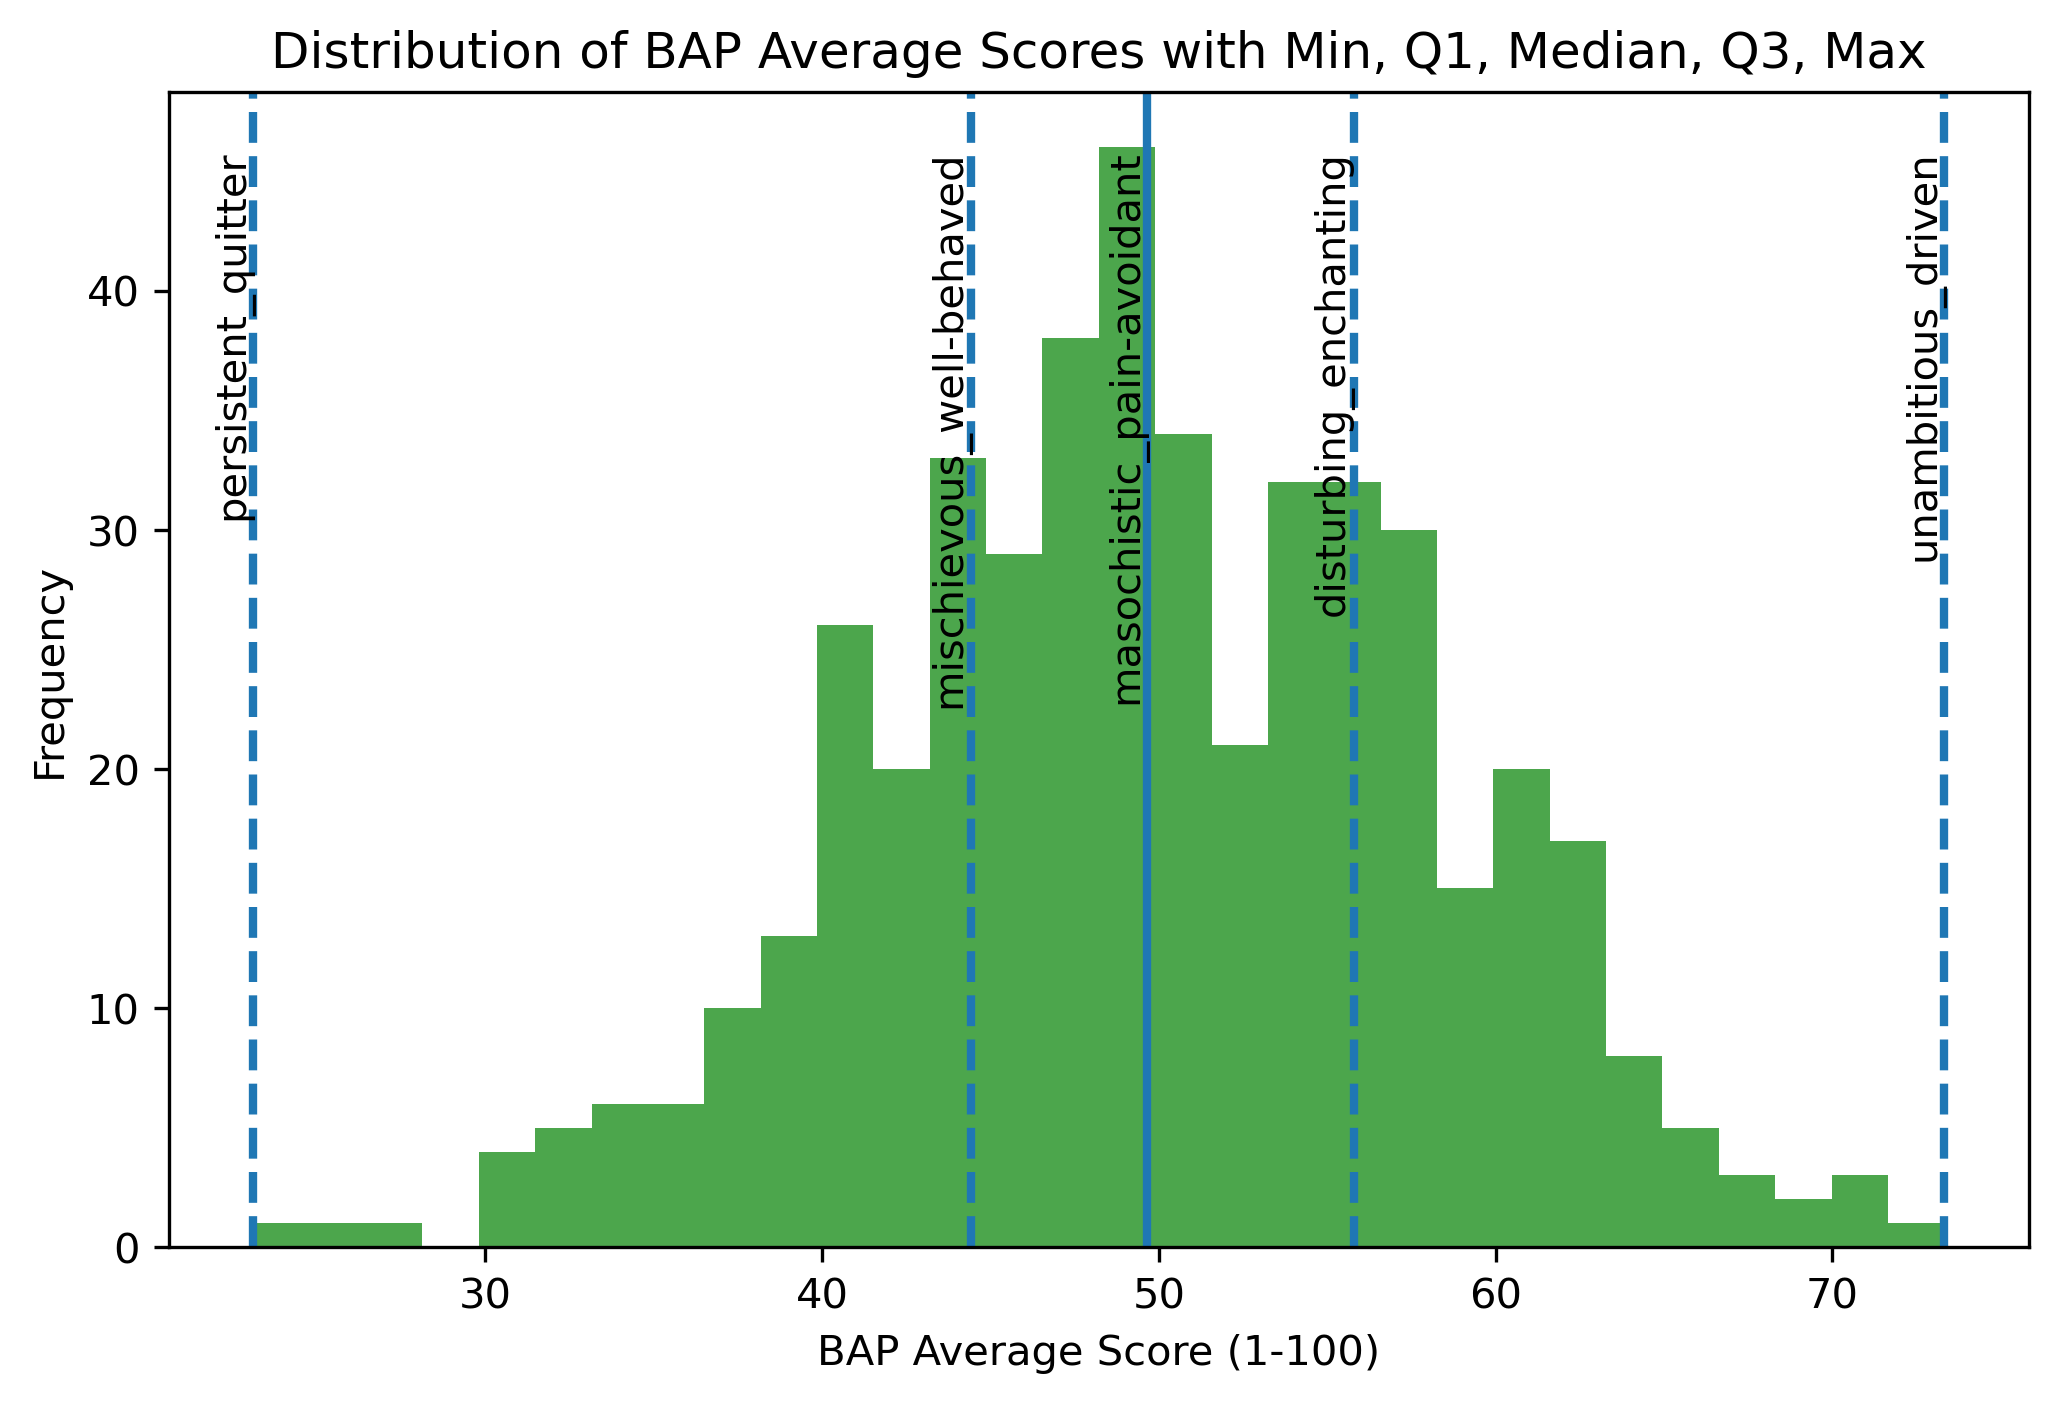

In [135]:
Image(filename = "visualizations/bap_averages_histogram.png")

For “unambitious_driven,” the average ratings are skewed toward driven, suggesting that characters are generally perceived as driven rather than unambitious. In contrast, “persistent_quitter” shows ratings concentrated closer to persistent, indicating that characters are more often characterized as persistent than as quitters. Together, these patterns suggest that in movie character development, traits such as being driven and persistent are more commonly emphasized or recognized by viewers than their opposing traits.

4. Plotted a histogram of the standard deviations within each BAP column.

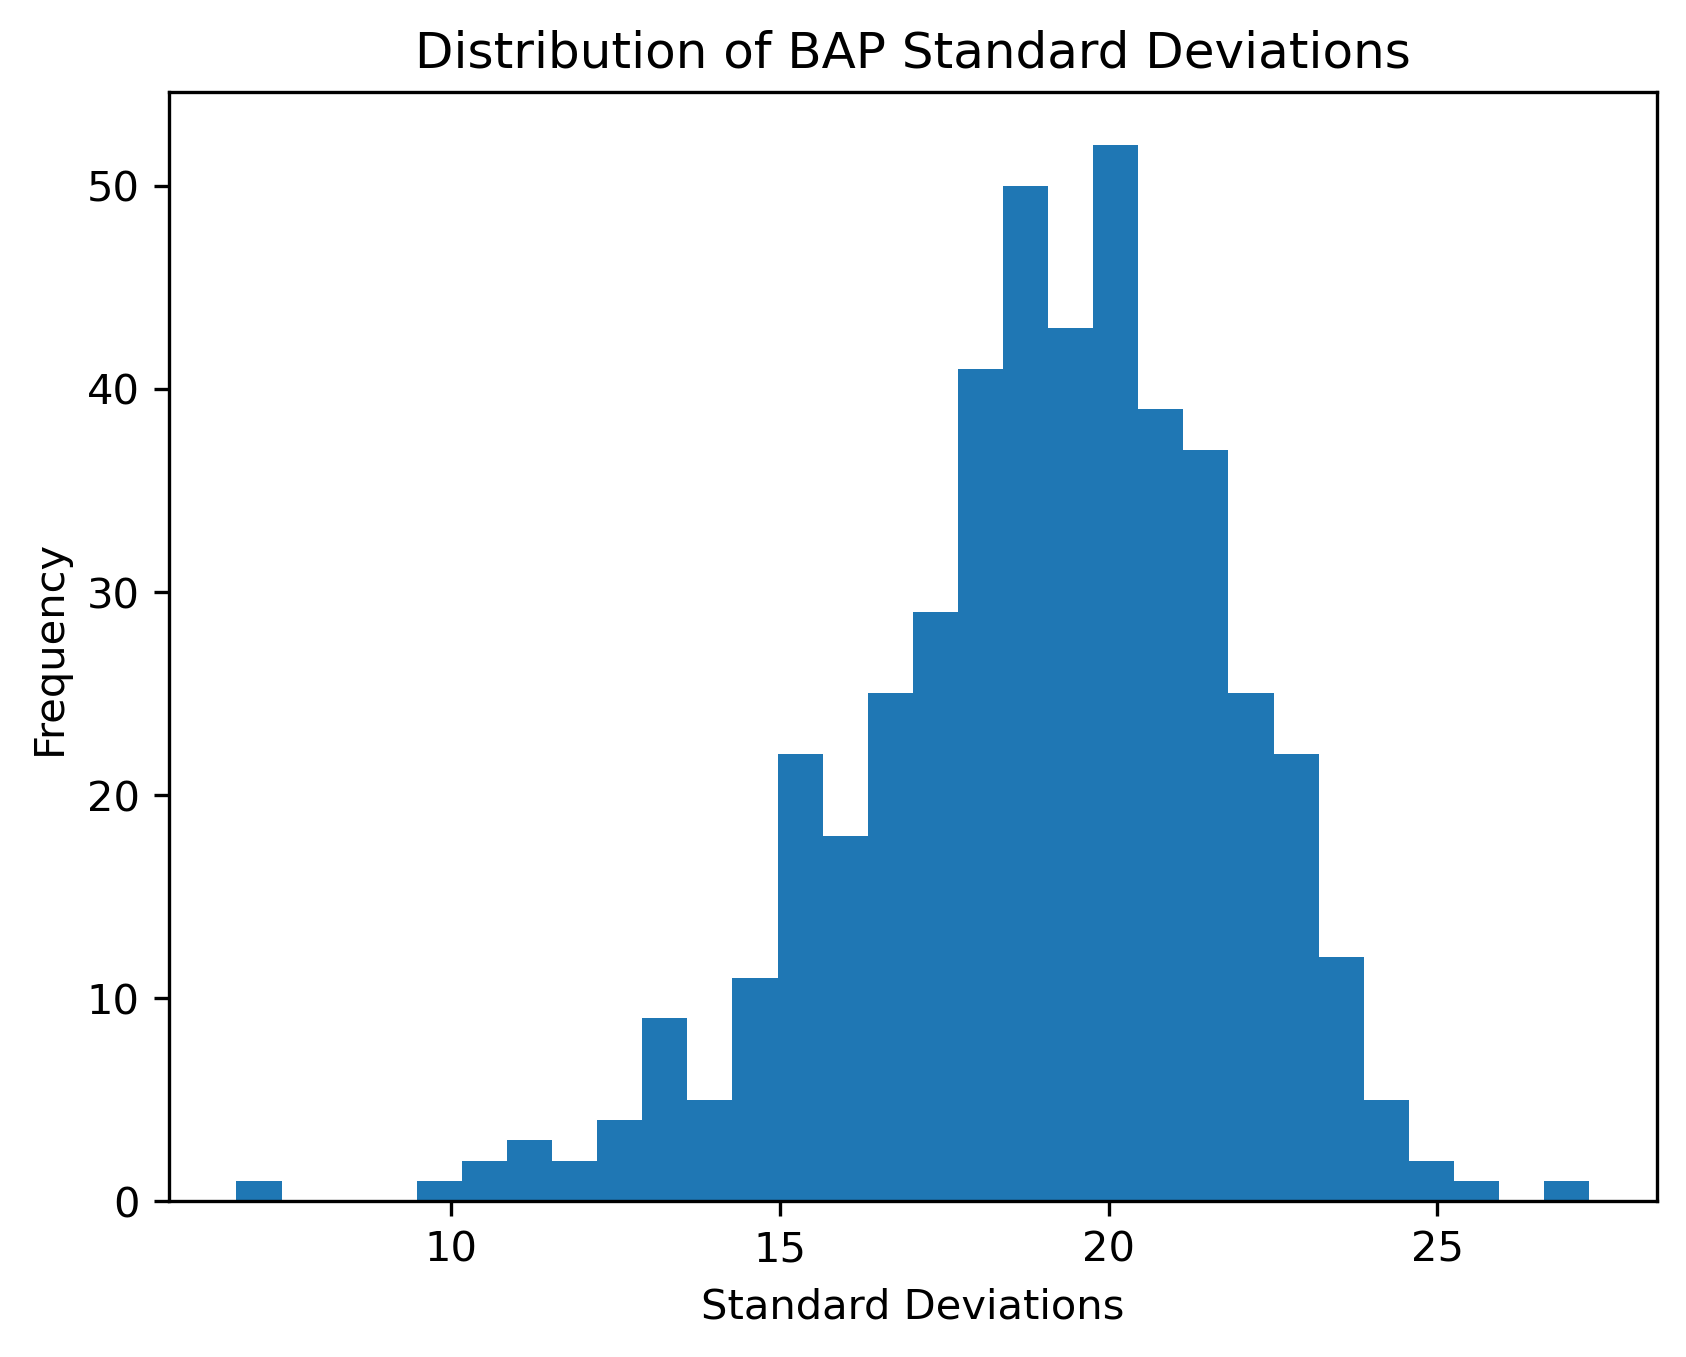

In [132]:
Image(filename = "visualizations/bap_std_histogram.png")

The BAP ratings seem to vary from their means as much as approximately 28 scores to about 6. While on average they seem to vary close to about 20 scores. BAPs like “right-brained left-brained” or “Coke Pepsi” might not be very hard to discern characters that are on the polar opposites since they aren’t very intuitive as to what a more right-brained person looks like or a more “Coke” person is. On the other hand, for BAPs like “masculine feminine” or “parental childlike”, it is clearer and more intuitive to understand what more female than male means or what being more of a main character than side character looks like.

5. Plotted a correlation matrix between the BAP columns for a better understanding for the data before PCA.

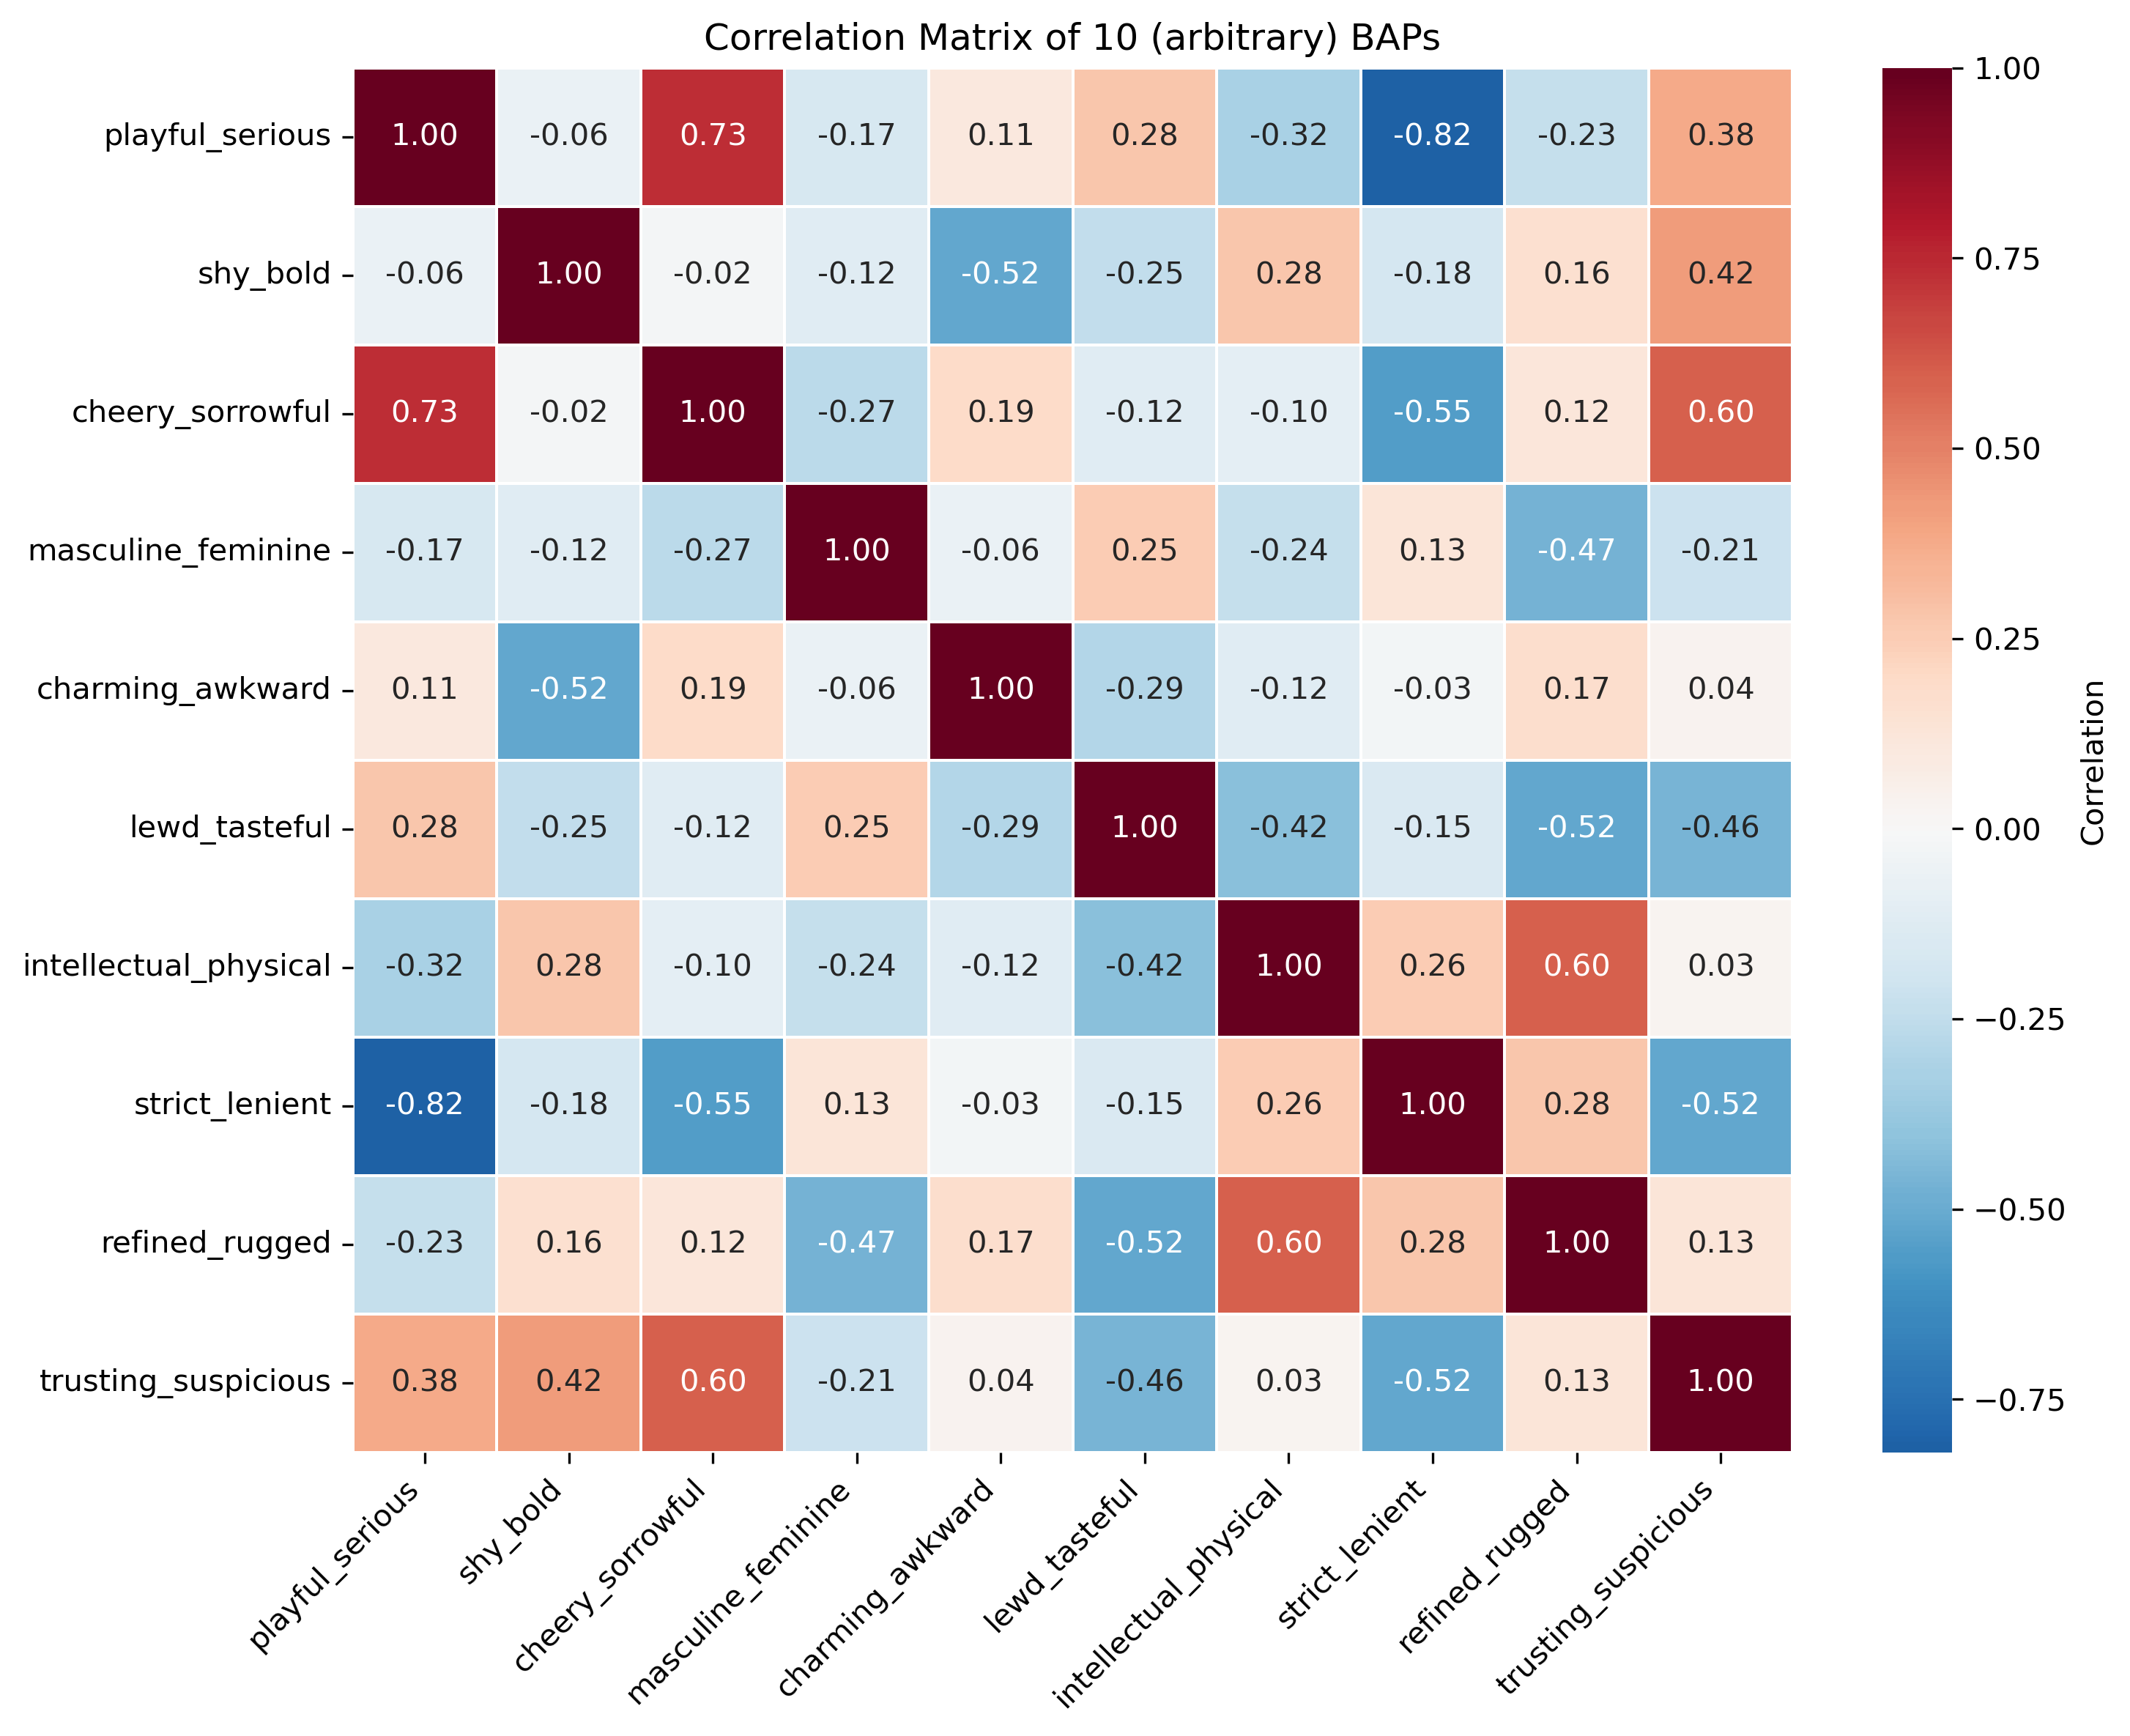

In [136]:
Image(filename = "visualizations/default_correlation_map.png")

In the correlation matrix, there are some variables that are very strongly correlated like "playful_serious" and "strict_lenient" are strongly negatively correlated assuming they have a linear relationship. This makes sense because people who are more playful are likely also lenient while those who are serious are strict. There are also a lot of close to uncorrelated variables like "trusting_suspicious" and "intellectual_physical" where they don’t seem to be related in a certain way.

6. Average rankings distribution for the top 10 sources or media sources with the most number of characters.

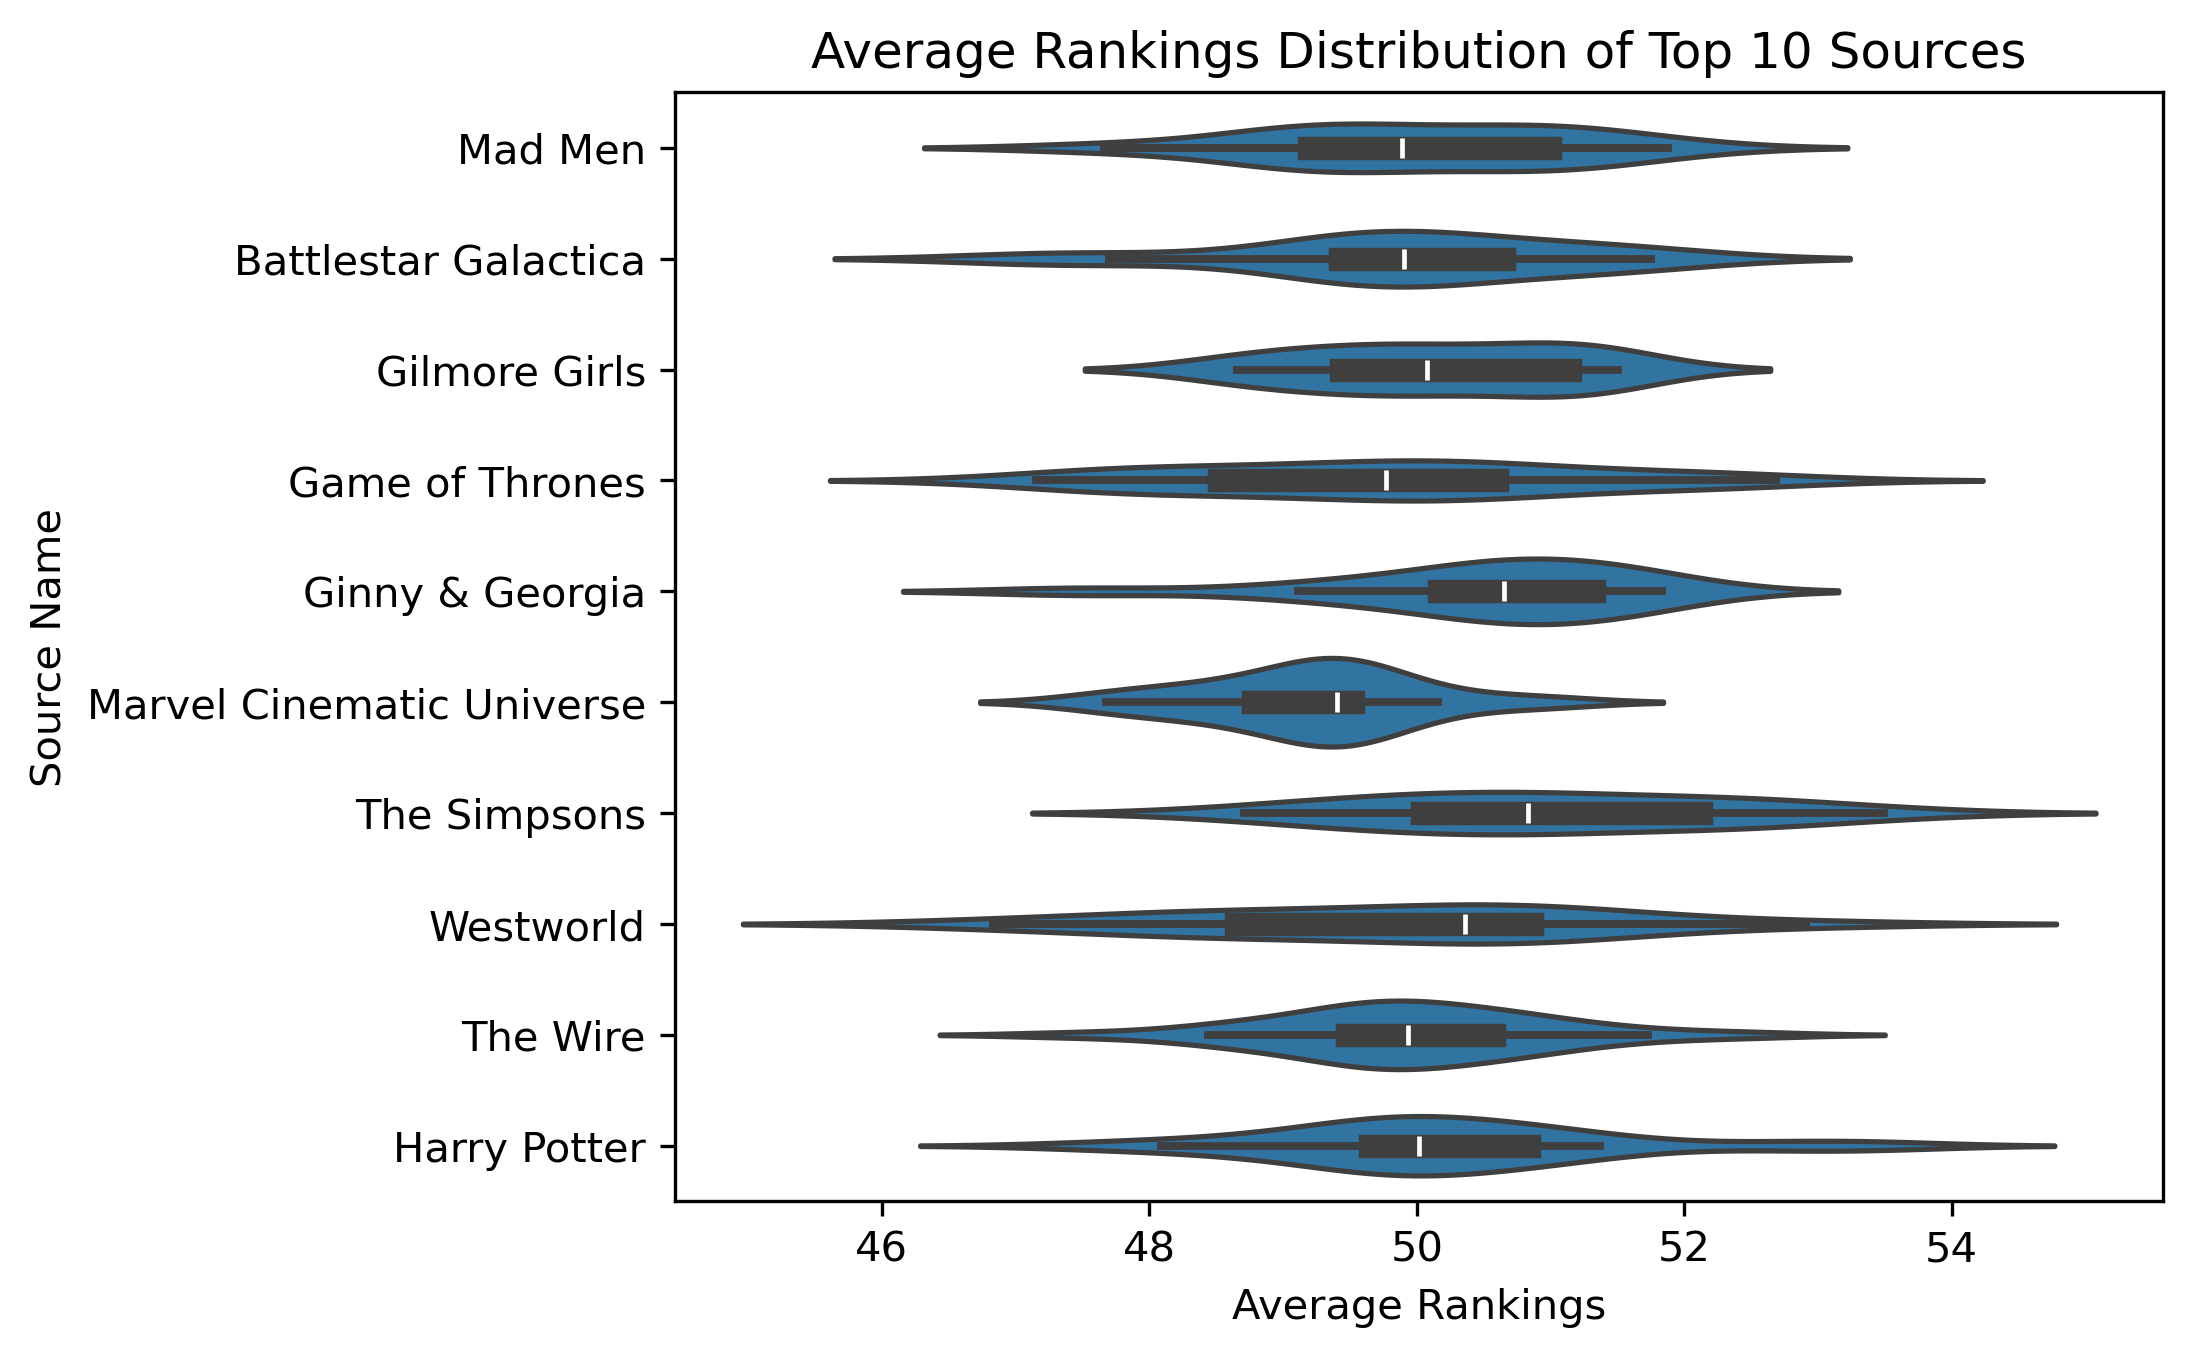

In [139]:
Image(filename = "visualizations/average_rankings_for_top10_sources.png")

While the average rankings roughly center around 50, characters in the Marvel Cinematic Universe have, on average, slightly lower ratings than average, while Westworld characters have higher ratings than the average.

## Finding Associations

From the exploratory data analysis, we found fun associations that fans would likely find amusing or obvious. But there are also associations that may suggest deeper cultural norms about how certain categories of people are depicted in fiction. In this section, we look at four dimensions that speak to important demographic categories: `straight_queer`, `young_old`, `masculine_feminine`, and `rich_poor`. It is important to note that, by categorizing characters based on respondents' ratings on these dimensions, we are assessing how _perceptions_ of these categories are related to _perceptions_ of other dimensions.

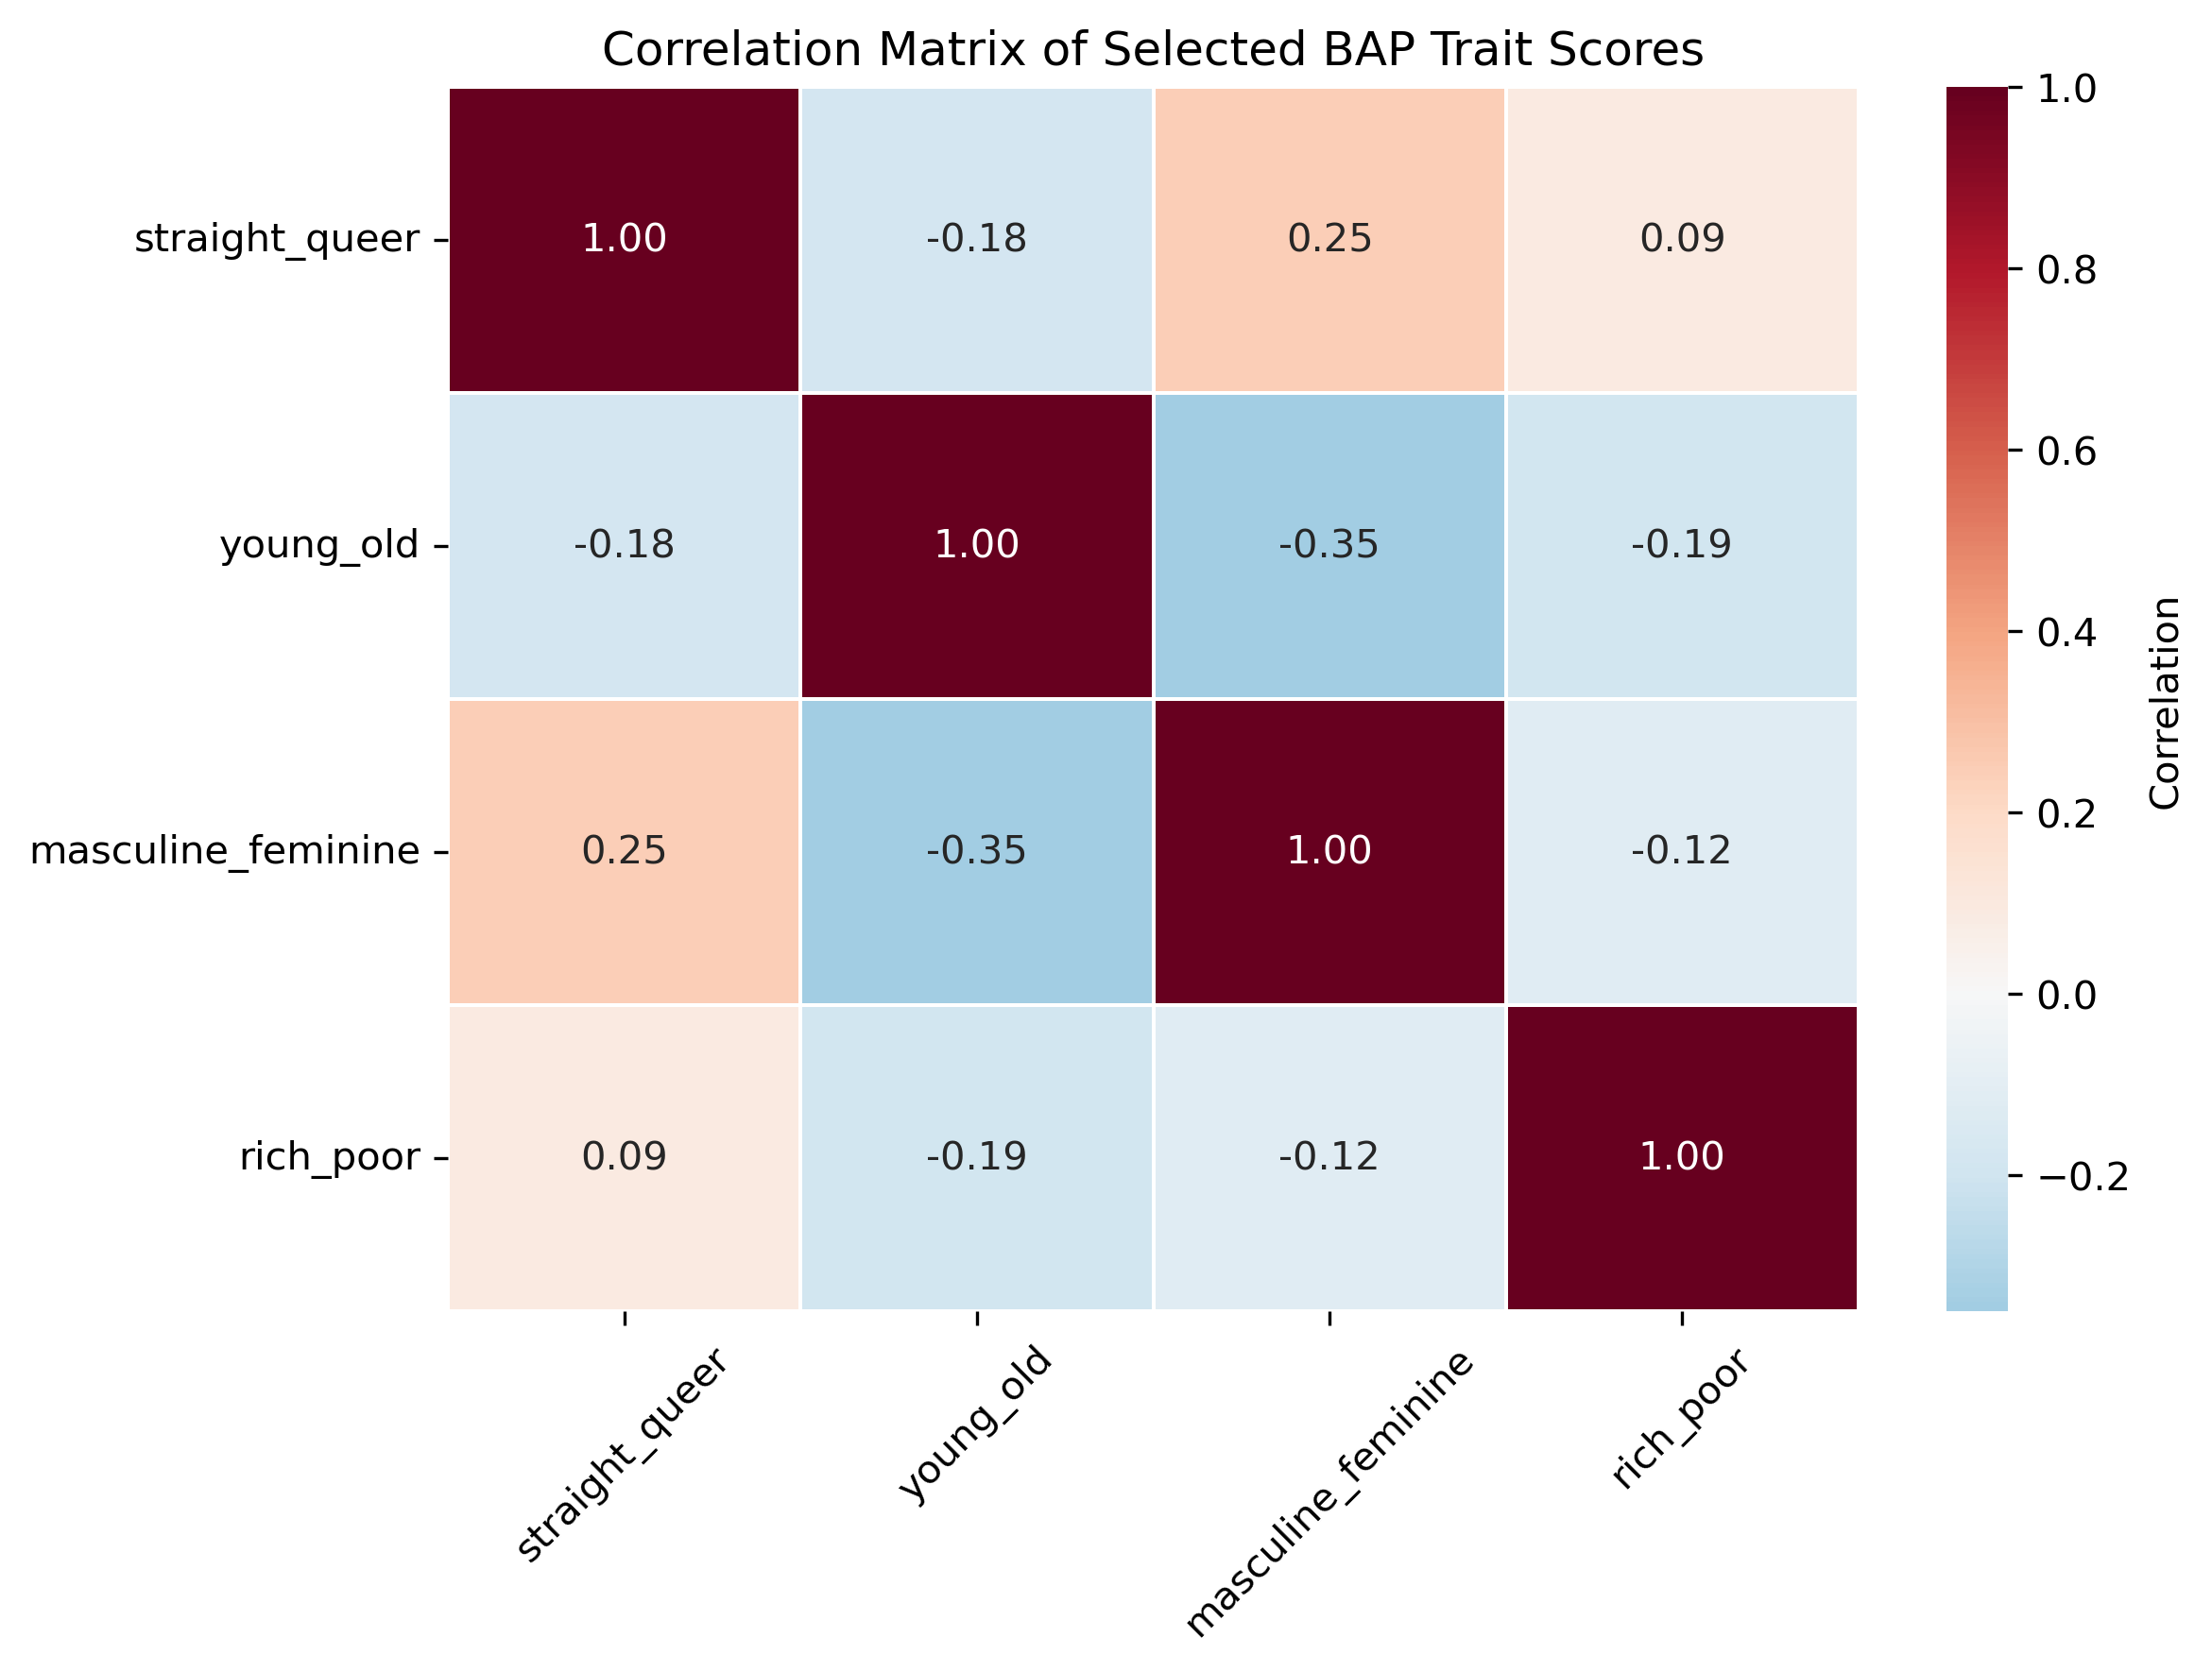

In [147]:
Image(filename = "visualizations/selected_dim_correlation_map.png")

We see that the features are not very strongly (pairwise) correlated with each other. This is good as we do not need to reduce dimensionality. 

While these dimensions are not strongly (pairwise) correlated with each other, they may be correlated with other dimensions in the data set. To start, we can standardize the data through an array and then turn it back into a pandas dataframe. Next, we create a 500x500 correlation matrix. While this would be a mess to visualize, we can select our target dimensions and see if if they are highly correlated with any other dimensions.

In [151]:
target_corr_df = pd.read_csv("data/target_correlations.csv")
target_corr_df

,straight_queer,young_old,masculine_feminine,rich_poor
0,straight_queer (1.0),young_old (1.0),masculine_feminine (1.0),rich_poor (1.0)
1,androgynous_gendered (-0.71),modern_historical (0.61),macho_metrosexual (0.68),proletariat_bourgeoisie (-0.84)
2,hipster_basic (-0.47),old-fashioned_progressive (-0.6),giggling_chortling (-0.6),blue-collar_ivory-tower (-0.79)
3,macho_metrosexual (0.45),trendy_vintage (0.57),glamorous_spartan (-0.58),oppressed_privileged (-0.72)
4,normal_weird (0.43),beautiful_ugly (0.54),tailor_blacksmith (-0.56),folksy_presidential (-0.68)
5,abstract_concrete (-0.42),vibrant_geriatric (0.52),utilitarian_decorative (0.56),lowbrow_highbrow (-0.67)
6,freak_normie (-0.42),attractive_repulsive (0.51),cat-person_dog-person (-0.53),extravagant_thrifty (0.66)
7,cat-person_dog-person (-0.42),giggling_chortling (0.51),feminist_sexist (-0.53),scruffy_manicured (-0.64)
8,quirky_predictable (-0.42),apprentice_master (0.5),scruffy_manicured (0.49),frugal_lavish (-0.63)
9,autistic_neurotypical (-0.42),liberal_conservative (0.5),kangaroo_dolphin (0.49),eloquent_unpolished (0.63)


By social sciences standards, there are some strong correlations here. For example, `straight_queer` is inversely correlated with `androgynous_gendered`, which suggests that the more queer a character is, the more likely their depiction is androgynous. However, these correlations are not controlling for the influence of other dimensions. We can use the `pingouin` library to calculate the partial correlations, which show us correlations between dimensions while controlling for other dimensions.

In [152]:
target_pcorrs_df = pd.read_csv("data/target_partial_corr.csv")
target_pcorrs_df

,straight_queer,young_old,masculine_feminine,rich_poor
0,straight_queer (1.0),young_old (1.0),masculine_feminine (1.0),rich_poor (1.0)
1,androgynous_gendered (-0.37),whippersnapper_sage (0.18),feminist_sexist (-0.25),proletariat_bourgeoisie (-0.3)
2,macho_metrosexual (0.13),gamer_non-gamer (0.15),macho_metrosexual (0.22),oppressed_privileged (-0.25)
3,musical_off-key (-0.1),celebrity_boy/girl-next-door (-0.14),giggling_chortling (-0.18),blue-collar_ivory-tower (-0.2)
4,open-minded_close-minded (-0.09),attractive_repulsive (0.14),cat-person_dog-person (-0.18),celebrity_boy/girl-next-door (0.1)
5,modest_flamboyant (0.09),juvenile_mature (0.13),chic_cheesy (-0.13),frugal_lavish (-0.1)
6,cat-person_dog-person (-0.09),vibrant_geriatric (0.12),glamorous_spartan (-0.13),good-cook_bad-cook (0.09)
7,focused-on-the-present_focused-on-the-future (...,slow-talking_fast-talking (-0.11),chivalrous_businesslike (0.12),sickly_healthy (0.09)
8,hugs_handshakes (0.08),rap_rock (0.11),goth_flower-child (0.11),unlucky_fortunate (-0.09)
9,kinky_vanilla (-0.08),modern_historical (0.11),creepy_disarming (-0.11),entrepreneur_employee (0.09)


These coefficients are far less suggestive of strong relationships. However, given how many redundant dimensions we have in the data, this might simply be an issue of too much noise and too unsophisticated of a method. We can revist these questions after doing some dimension reduction in the next section.

## Identifying Archetypes

In the Vermont Computational Story Lab’s analysis of the same dataset, they used “dimension reduction” to identify 6 key dimensions in the data that create 12 archetypes. However, because the replication code has not been made available, it is unclear what techniques they used to reduce the dimensionality of the data. In this section, we employ a mixture of principal component analysis (PCA), Gaussian mixture model (GMM), and hierarchical agglomerative clustering (HAC) to propose some potential archetypes.

### PCA
For PCA, it's important to scale variable values because we are comparing Euclidean distances. Technically, all of our variables should already be on the same scale, but this will become more important when we get to the self-organizing map, so we'll scale them here for consistency. 

We will assess how many components we should have. The first technique plotted below is adapted from [this tutorial](https://mikulskibartosz.name/pca-how-to-choose-the-number-of-components). The author recommends that the number of components chosen should account for 95% of the variance.

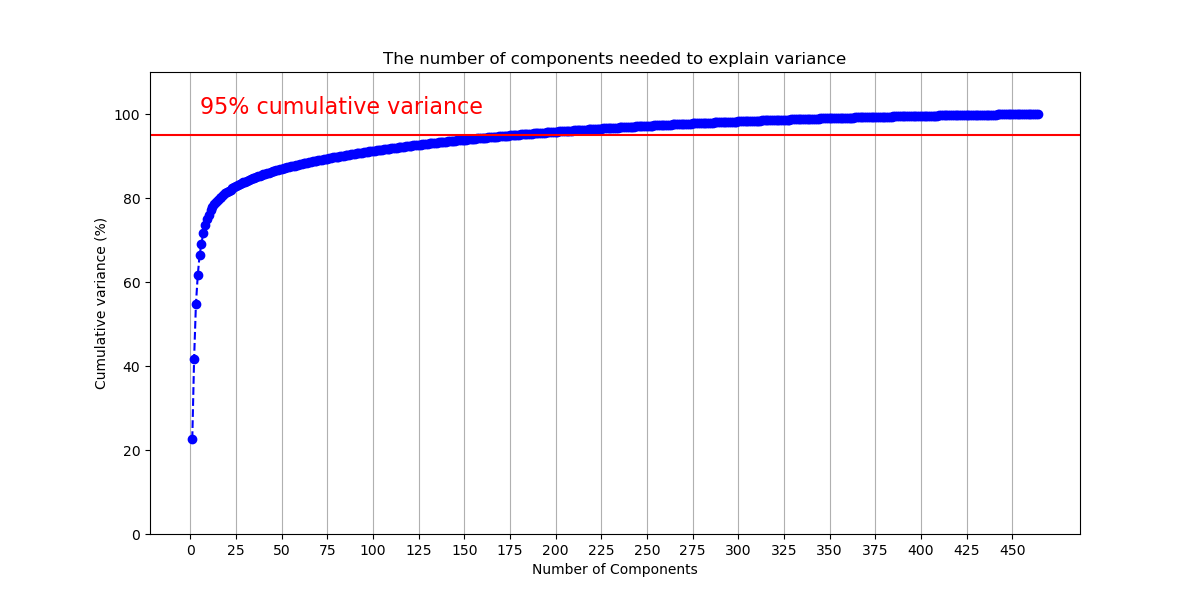

In [161]:
Image(filename = "visualizations/cumulative_variance_PCA.png")

The figure shows that we will need 177 components to capture 95% of the variance. 177 components does not reduce the dimensionality of the data very much. Thus, we flipped the figure to see how much variance is captured by each component. Given our previous results, we will limit this to the first 50 components to make the data more legible.

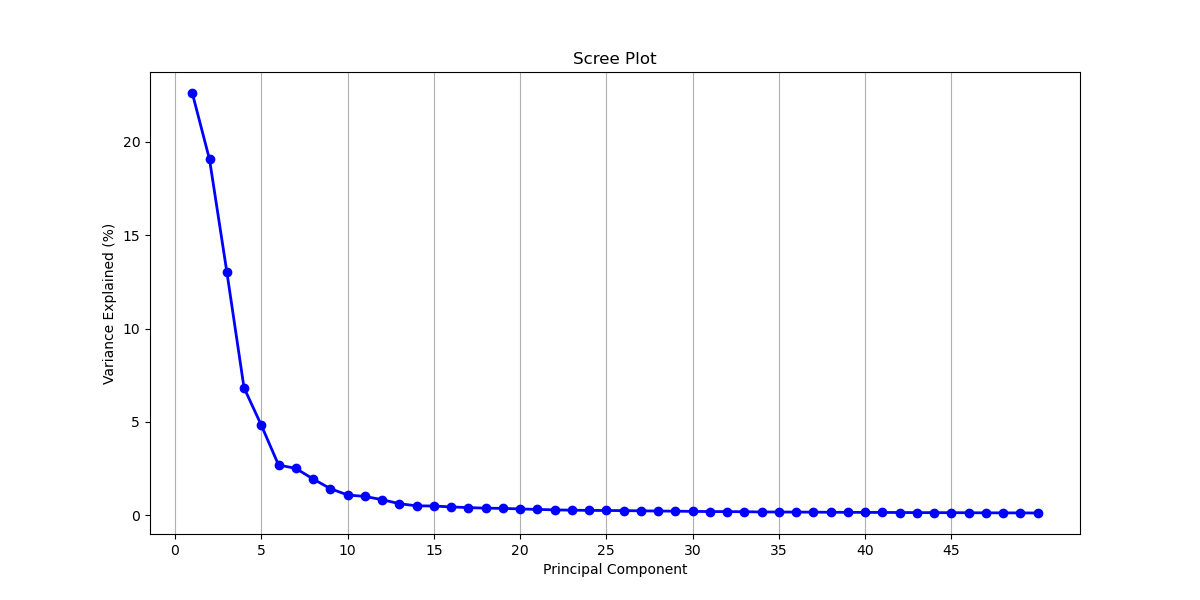

In [162]:
Image(filename = "visualizations/scree_plot_PCA.png")

Another common dimension reduction strategy is to only select components from before the curve begins to flatten out, which would be 5 components. At 5 components, 66.4% of the variance is captured.

To see which of the 500 dimensions contribute the most to each of the components, we can access the component loadings. Loadings tell us both the magnitude and direction of a given dimension, which, together indicate how the dimension contributes to the presence of a given component: A (relatively) larger, positive loading suggests that that dimension contributes more to the presence of that component. We retrieve the top 10 loadings from the first 15 components. We swap their values (e.g., 0.091049) for the dimension's name (e.g., `rude_respectful`). Then, we add the loading's sign (positive or negative) to the name.

In [170]:
pca_loadings_10 = pd.read_csv("data/pca_comp_loadings.csv")
pca_loadings_10

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,+rude_respectful,+random_pointed,+charismatic_uninspiring,+scruffy_manicured,+lumberjack_mad-scientist,+leisurely_hurried,+attractive_repulsive,+modern_historical,+luddite_technophile,+masculine_feminine,+main-character_side-character,+yes-man_contrarian,+thin_thick,+sickly_healthy,+rap_rock
1,-angelic_demonic,+playful_serious,-mundane_extraordinary,-glamorous_spartan,-nerd_jock,+sleepy_frenzied,-comedic_dramatic,-spiritual_skeptical,-high-tech_low-tech,-cat-person_dog-person,-everyman_chosen-one,-political_nonpolitical,+libertarian_socialist,-hipster_basic,-focused-on-the-present_focused-on-the-future
2,+debased_pure,-strict_lenient,-tiresome_interesting,-refined_rugged,+sporty_bookish,-tense_relaxed,+beautiful_ugly,-luddite_technophile,-mathematical_literary,+straight_queer,-oppressed_privileged,-likes-change_resists-change,-political_nonpolitical,-masculine_feminine,-sexual_asexual
3,+poisonous_nurturing,+goofy_unfrivolous,+badass_weakass,+proletariat_bourgeoisie,-intellectual_physical,+aloof_obsessed,+sad_happy,-philosophical_real,-gamer_non-gamer,-androgynous_gendered,-hard-work_natural-talent,-activist_nonpartisan,+straight_queer,-outdoorsy_indoorsy,-masochistic_pain-avoidant
4,-wholesome_salacious,-rational_whimsical,+adventurous_stick-in-the-mud,+blue-collar_ivory-tower,+common-sense_analysis,+trolling_triggered,+chic_cheesy,-theist_atheist,-active_slothful,+sexual_asexual,+important_irrelevant,-tiresome_interesting,+main-character_side-character,-tall_short,+Italian_Swedish
5,+naughty_nice,-focused_absentminded,-repetitive_varied,+punk-rock_preppy,-cat-person_dog-person,+calm_anxious,+sexual_asexual,-poetic_factual,-eager_reluctant,-German_English,+sheltered_street-smart,+believable_poorly-written,+western_eastern,-musical_off-key,-tall_short
6,+selfish_altruistic,-studious_goof-off,+open-to-new-experinces_uncreative,-tailor_blacksmith,+macho_metrosexual,-offended_chill,+cool_dorky,+evolutionist_creationist,-ambitious_realistic,+main-character_side-character,-envious_prideful,-explorer_builder,-unlucky_fortunate,-French_Russian,-thin_thick
7,-empath_psychopath,+spontaneous_deliberate,+brave_careful,-extravagant_thrifty,+straightforward_cryptic,+remote_involved,-trolling_triggered,+high-tech_low-tech,-chill_sassy,-chic_cheesy,+protagonist_antagonist,+neutral_opinionated,-city-slicker_country-bumpkin,-good-cook_bad-cook,+gamer_non-gamer
8,+arrogant_humble,-coordinated_clumsy,+maverick_conformist,+frugal_lavish,-philosophical_real,+unemotional_emotional,+traumatized_flourishing,-rural_urban,-engineerial_lawyerly,-direct_roundabout,-good-cook_bad-cook,+permanent_transient,+rural_urban,-gamer_non-gamer,-lustful_chaste
9,+cunning_honorable,+disorganized_self-disciplined,+vibrant_geriatric,-cosmopolitan_provincial,+normal_weird,-active_slothful,-chronically-single_serial-dater,-metaphorical_literal,-princess_queen,+flawed_perfect,+rich_poor,+enslaved_emancipated,-activist_nonpartisan,-philosophical_real,-western_eastern


To interpret this we can look at `PC1`'s top 2 loadings come from the dimensions `+rude_respectful` and `-angelic_demonic`. This tells us that both dimensions contribute to the presence of `PC1` but that they are inversely relates. This means someone who scores highly on `respectful` would be expected to score lower on `demonic`. _When interpreting the dimensions, remember that the right-hand side corresponds to the higher scores, and the left-hand side corresponds to the lower scores_. Interpreting the loadings, the first five components seem to get at the following dichotomies:
* "good" vs "bad"
* "serious" vs "silly"
* "bland" vs "cool"
* "refined" vs "rough"
* "smart" vs "strong"

There are some components which speak to the questions posed in finding associations. `PC4` contains `rich_poor`, as well as other dimensions indicating wealth. The component would seem to suggest that the rich are depicted as more "manicured", "preppy", and "lavish" as opposed to "scruffy", "punk-rock", and "frugal". Past the first five components, the groupings of terms become harder to interpret and their explanatory power diminishes, but we see `young_old` make an appearance in `PC7`. Here "old" is aligned with "repulsive", "comedic", and "happy." `PC10` brings together `masculine_feminine` and `straight_queer`, with with queerness and feminity aligned. They are also aligned with "cat-person", "androgynous", "asexual", "side-character", and, oddly enough, "German."

### Clustering: Gaussian Mixture Models
While PCA reduces dimensions, it does not cluster our data. However, we can use PCA to cluster the data with reduced noise from excess dimensions. One way of clustering our data is through a Gaussian Mixture Model. This model is ideal for its probabilistic nature: It would allow us to have "soft" clusters, with some characters occupying the boundaries between multiple archetypes. To quickly test this model out, we can input the 177 components of our PCA which explain 95% of the variance and cluster our characters into one of two groups. We can plot each character on a scatterplot with the first two principle components as the axes.

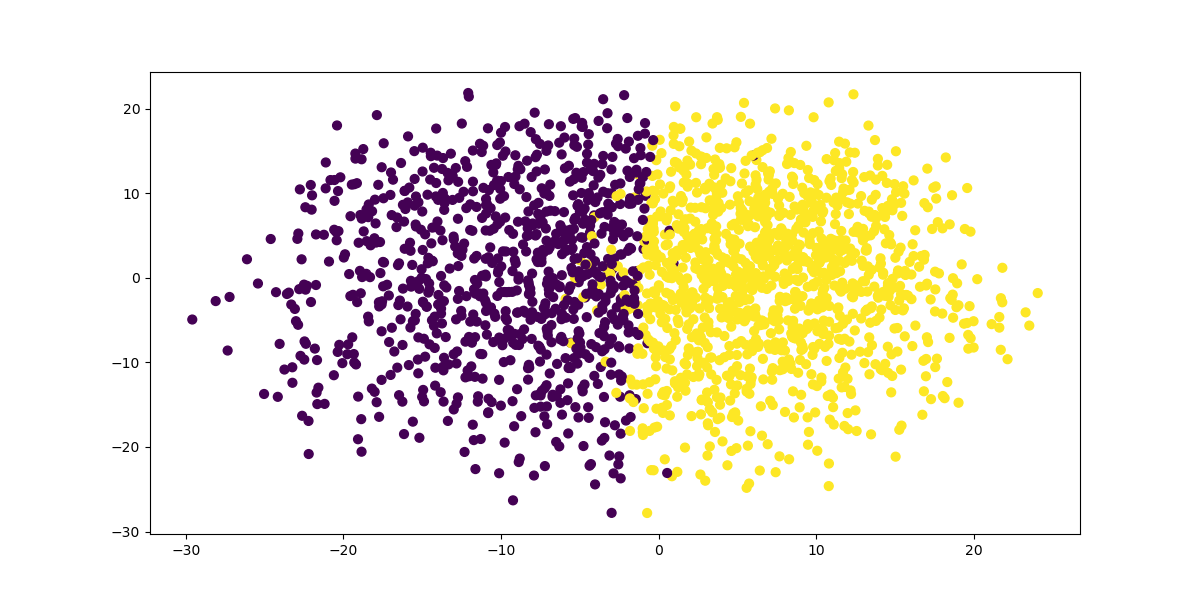

In [171]:
Image(filename = "visualizations/GMM_2_components.png")

The clusters separate fairly well. Now let's take a look at what characters fall into each group. This might help us assess the viability of this method. We can assign cluster labels to the characters and input each character's score on the 177 components. We chose characters from the Batman Universe for this analysis.

In [181]:
char_gmm2 = pd.read_csv("data/char_gmm2.csv")
char_gmm2

,character,GMM_cluster_2
0,Bruce Wayne,2
1,Alfred Pennyworth,5
2,The Joker,2
3,James Gordon,5
4,Harvey Dent,3
5,Rachel Dawes,5


Looks like all the good guys (assigned 1) and all the bad guys (assigned 0) are clustered together except Bruce Wayne. To try and interpret this division, we can take the mean of every PCA component for each of the clusters and then reverse the dimensionality reduction. We reinstantiate our PCA with only the first 177 components to do this. Next, we go through each cluster and retrieve the original dimensions with the highest absolute average. We still care about the direction of the sign though, so we print the mean value alongside the dimension name. It turns out that the two clusters are just the opposite of one another: Cluster 0 is defined by being more `salacious` while Cluster 1 is more `wholesome`.


Cluster 0:
- wholesome_salacious 0.9025342213689472
- debased_pure -0.9026747132340824
- poisonous_nurturing -0.9061163912246576
- naughty_nice -0.9070488362494453
- angelic_demonic 0.923368894187003

Cluster 1:
- wholesome_salacious -0.6633978660326278
- debased_pure 0.6635011330349408
- poisonous_nurturing 0.6660309006387178
- naughty_nice 0.666716284112264
- angelic_demonic -0.6787121634406769

Now let's do the same analysis but with more initial clusters:

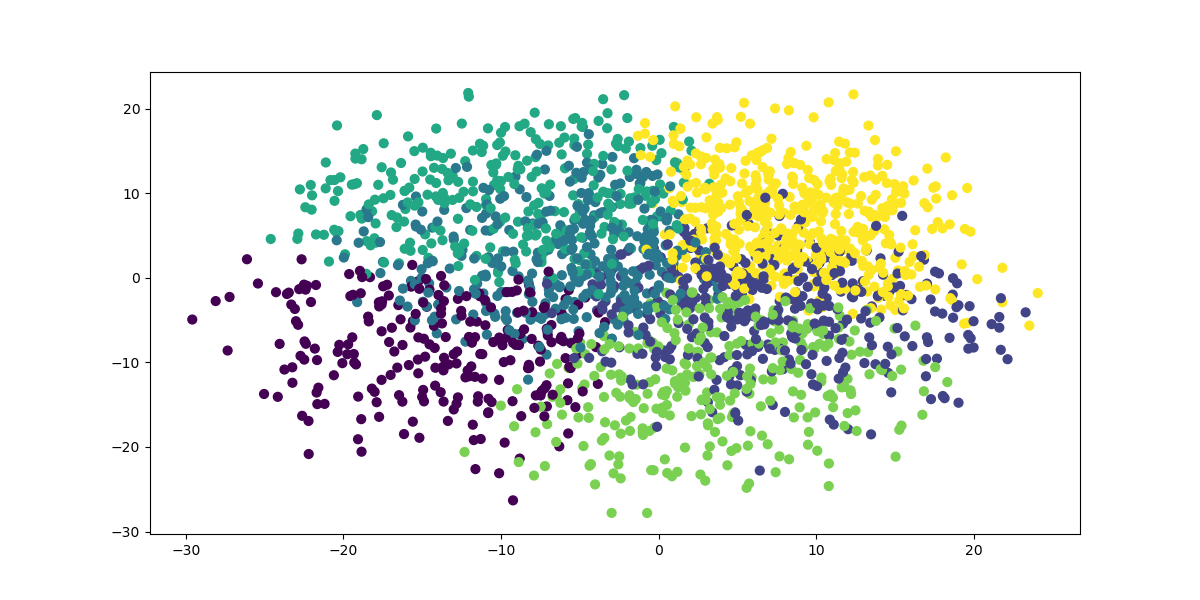

In [180]:
Image(filename = "visualizations/GMM_6_components.png")

With 6 clusters we find these cluster labels and interpretations:

In [182]:
char_gmm6 = pd.read_csv("data/char_gmm6.csv")
char_gmm6

,character,GMM_cluster_6
0,Bruce Wayne,2
1,Alfred Pennyworth,5
2,The Joker,2
3,James Gordon,5
4,Harvey Dent,3
5,Rachel Dawes,5


Cluster 2:
- radical_centrist -0.9733610781827806
- wild_tame -1.003978673280462
- spicy_mild -1.0110833758025781
- obedient_rebellious 1.0223442443210657
- tattle-tale_fuck-the-police 1.060581565929757

Cluster 3:
- open-minded_close-minded 1.3701923022527962
- democratic_authoritarian 1.3736697537406855
- chivalrous_businesslike 1.3766140943334486
- cruel_kind -1.4104591085346128
- soulless_soulful -1.4652646850003503

Cluster 5:
- ludicrous_sensible 1.020987850566561
- factual_exaggerating -1.0230865768091162
- stable_unstable -1.0240186681772343
- deranged_reasonable 1.0362451193607787
- juvenile_mature 1.05978402281463

With three times as many clusters, Bruce Wayne's allies all remain in the same group (one now defined by being _stable, sensible, factual, reasonable, and mature_). Meanwhile, Harvey Dents splits off, and The Joker and Bruce Wayne stay together. This suggests that, perhaps, a better technique for clustering the data would be _hierarchical_.

#### Hierarchical Clustering
While hierarchical clustering will employ different methods for differentiating clusters (and thus, is unlikely to replicate the clusters found through GMM), this is actually the reason for attempting to cluster the data with it: Perhaps what we need is a hierarchical approach to show how certain categories break down. We'll start by plotting a dendrogram to give us a sense of the shape of the data.

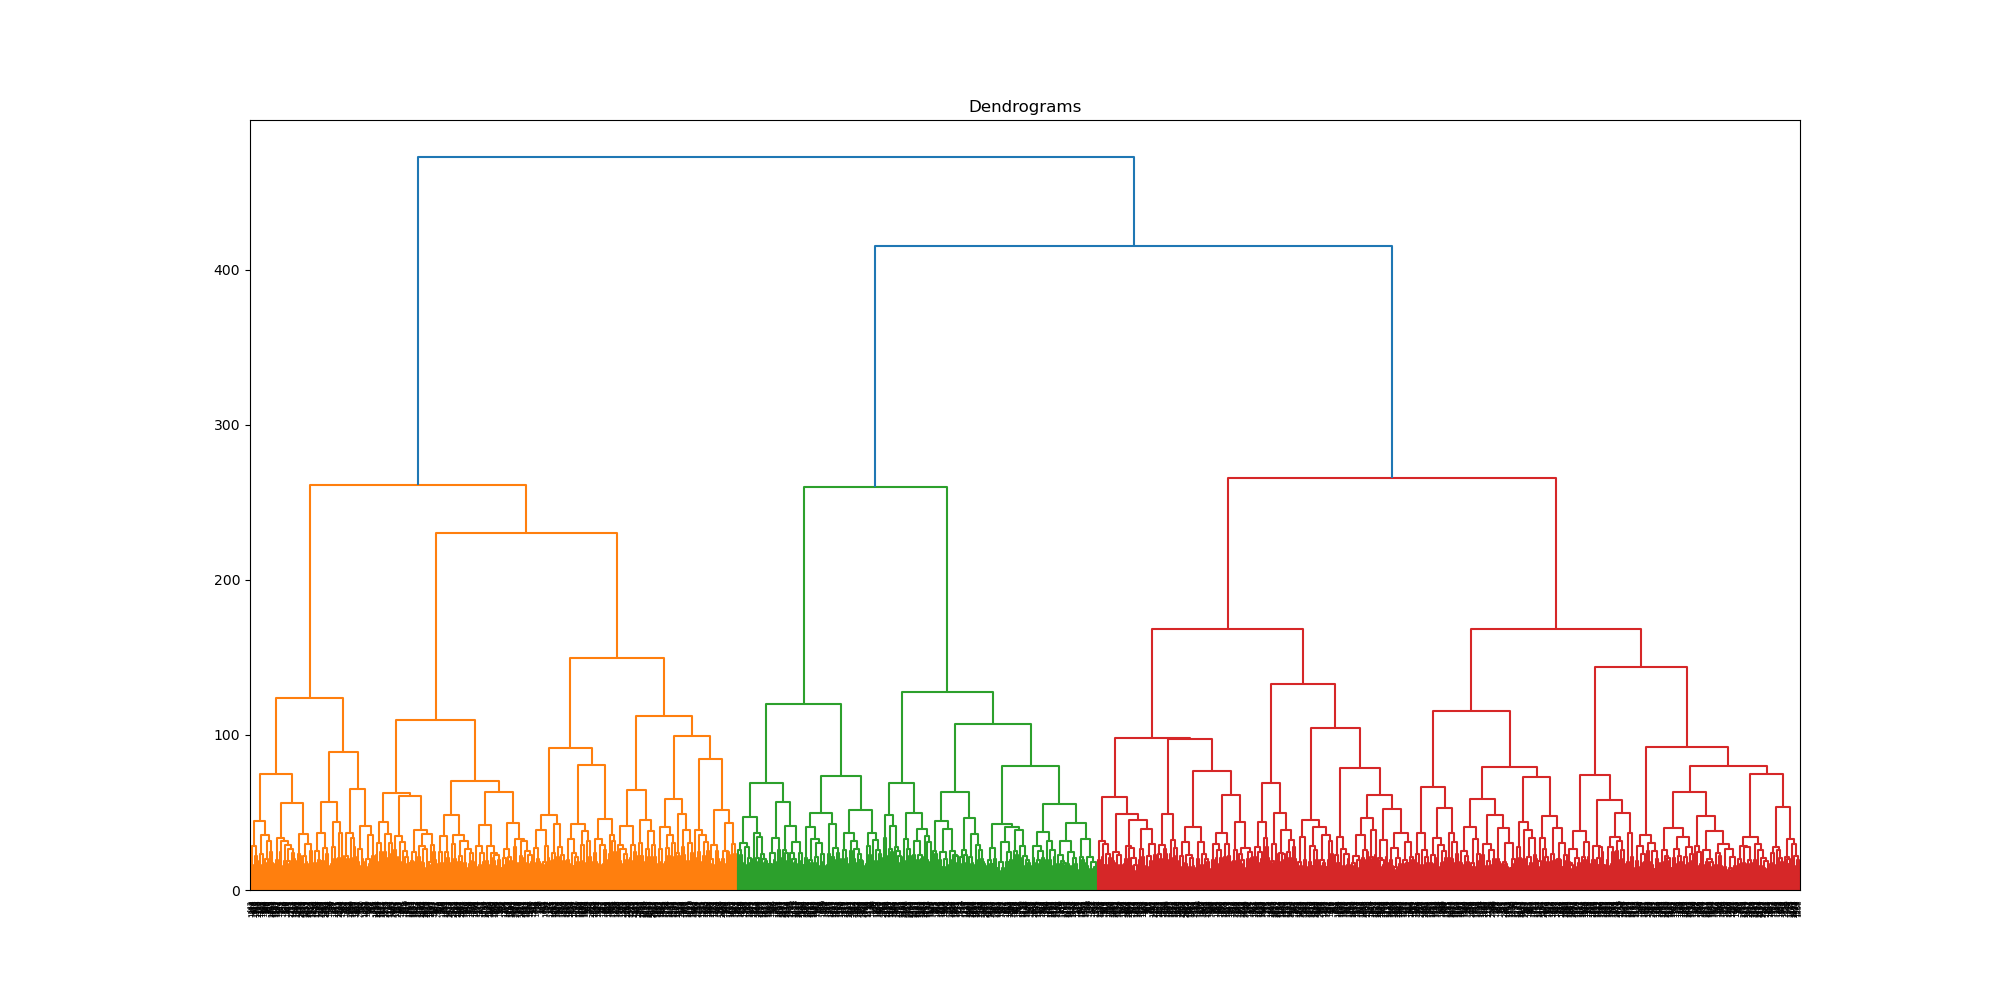

In [157]:
Image(filename = "visualizations/HCA_complete_dendrogram.png")

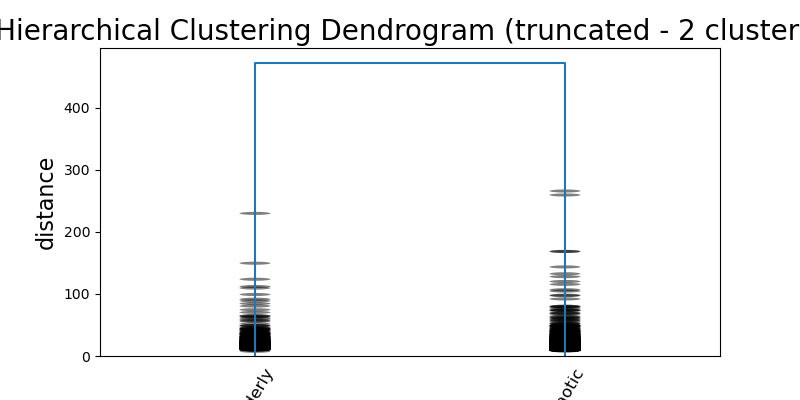

In [158]:
Image(filename = "visualizations/HCA_2cluster_dendrogram.png")

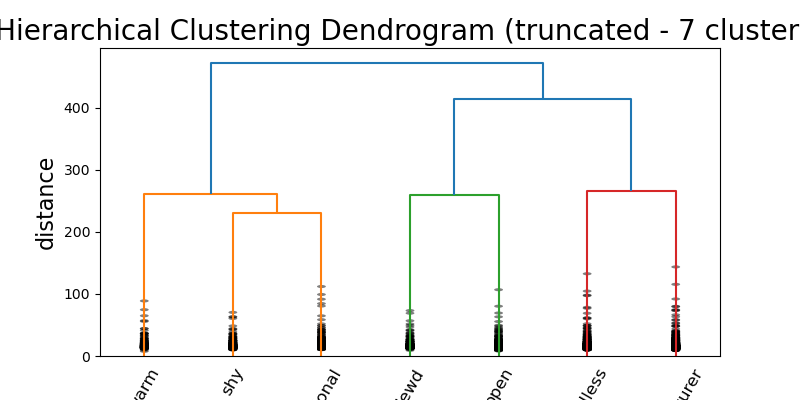

In [159]:
Image(filename = "visualizations/HCA_7cluster_dendrogram.png")

## Findings

## Author Contributions